p(theta|y)=L(theta|y)*p(theta)/ML

p(theta)=1 if 0<theta<1
and 1/ML=11

therefore, p(theta|y)=11*L(theta|y)

*1.1*

In [9]:
from itertools import combinations
def p_theta_y(y,theta):
    l=[i for i in range(1,11)]
    p_theta_y=len(list(combinations(l,y)))*(theta**y)*((1-theta)**(10-y))*11
    return p_theta_y

In [10]:
#(A)
p_theta_y(7,0.75)

2.7531051635742188

In [11]:
#(b)
p_theta_y(7,0.25)

0.03398895263671875

In [12]:
#(c)
p_theta_y(7,1)

0

*1.2*

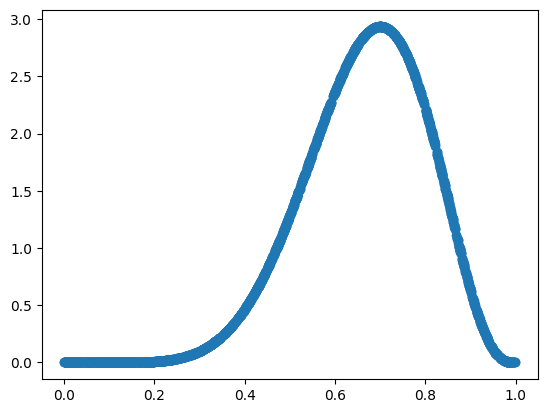

In [15]:
import numpy as np
import matplotlib.pyplot as plt
thetas=np.random.rand(2000)
posteriors=[p_theta_y(7,theta) for theta in thetas]
plt.scatter(thetas,posteriors)

0.7004386446907133 2.935093798303283


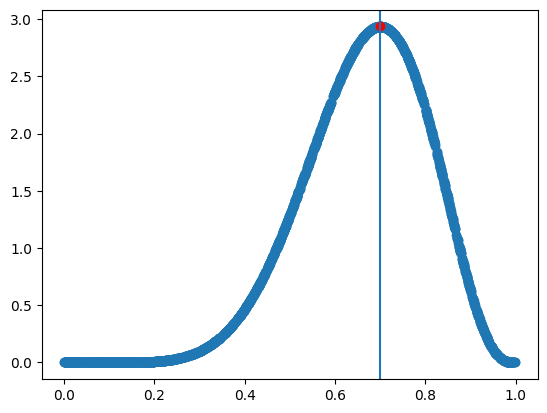

In [17]:
max_index = np.argmax(posteriors)
theta_max = thetas[max_index]
posterior_max = posteriors[max_index]
plt.scatter(thetas,posteriors)
plt.scatter(theta_max,posterior_max,color='red')
plt.axvline(theta_max)
print(theta_max,posterior_max)

*1.4*

likehood graph is just same as posterior graph scaled by 1/11

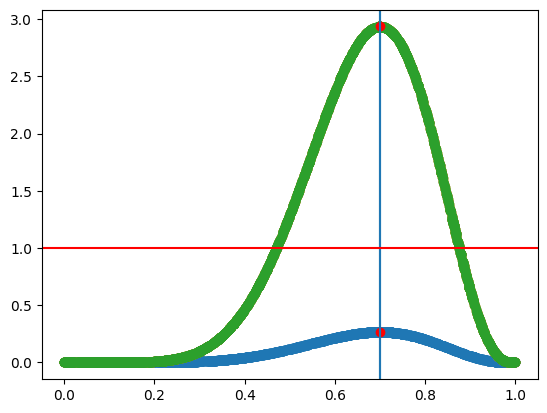

In [28]:
thetas=np.random.rand(2000)
likelihood=[p_theta_y(7,theta)/11 for theta in thetas]
plt.scatter(thetas,likelihood)
max_index = np.argmax(likelihood)
theta_max = thetas[max_index]
likelihood_max = likelihood[max_index]
plt.scatter(theta_max,likelihood_max,color='red')
plt.axvline(theta_max)
thetas=np.random.rand(2000)
posteriors=[p_theta_y(7,theta) for theta in thetas]
plt.scatter(thetas,posteriors)
max_index = np.argmax(posteriors)
theta_max = thetas[max_index]
posterior_max = posteriors[max_index]
plt.scatter(thetas,posteriors)
plt.scatter(theta_max,posterior_max,color='red')
plt.axvline(theta_max)
plt.axhline(1,xmin=0,xmax=1,color='red')


*2.1*


In [32]:
from math import sqrt,e
from scipy.stats import norm
def upd(mu):
    likelihood=1
    sigma=50
    for i in [300, 270, 390, 450, 500, 290,680, 450]:
        likelihood=(likelihood/(sigma*sqrt(2*3.14)))*e**((-1/(2*sigma**2))*(i-mu)**2)

    upd=likelihood*norm.pdf(mu,loc=250,scale=25)
    return upd

In [37]:
#(a)
upd(300)

6.838103925536294e-41

In [34]:
#(b)
upd(900)

0.0

In [35]:
#(c)
upd(50)

9.711050945473145e-138

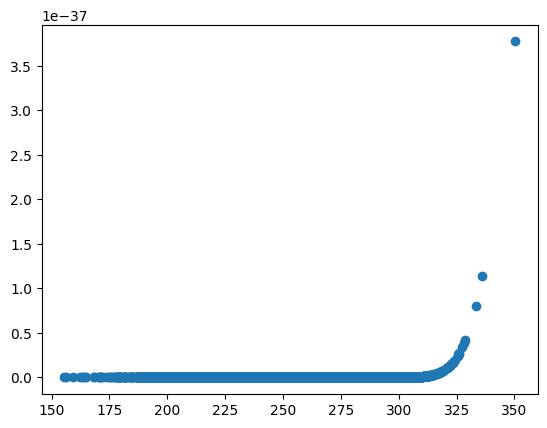

In [39]:
mus=norm.rvs(loc=250, scale=25, size=10000)
upds=[upd(mu) for mu in mus]
plt.scatter(mus,upds)

*5*

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Module-2/recognition.csv"
dat = pd.read_csv(url).iloc[:, 1:]  # Drop index column
Tw = dat['Tw'].values
Tnw = dat['Tnw'].values

print(dat.head())


           Tw         Tnw
0  285.077952  296.806019
1  267.518382  280.115725
2  289.920350  310.441680
3  399.067408  324.827633
4  359.988353  373.815164


*4.5.1*

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import truncnorm

sigma = 60

def prior_mu(mu):
    return norm.pdf(mu, 300, 50)

def prior_delta(delta):
    return truncnorm(a=0, b=np.inf, loc=0, scale=50).pdf(delta)

def unnormalized_posterior(mu, delta, Tw, Tnw):
    lw = np.prod(norm.pdf(Tw, mu, sigma))
    lnw = np.prod(norm.pdf(Tnw, mu + delta, sigma))
    prior = prior_mu(mu) * prior_delta(delta)
    return lw * lnw * prior


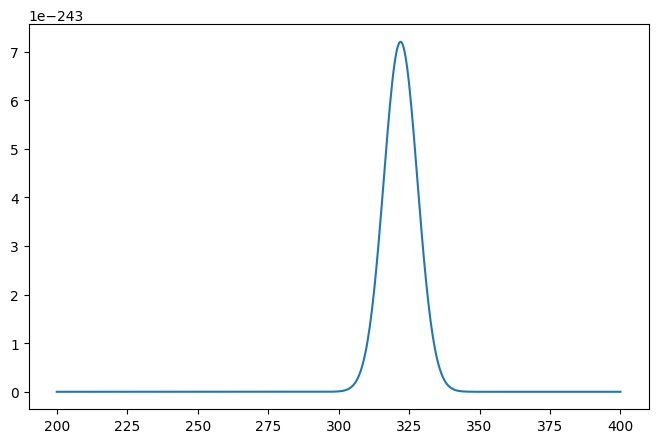

In [9]:
import matplotlib.pyplot as plt

mu_vals = np.linspace(200, 400, 500)
posterior_vals = [unnormalized_posterior(mu, 0, Tw, Tnw) for mu in mu_vals]

plt.figure(figsize=(8,5))
plt.plot(mu_vals, posterior_vals)
plt.show()


*4.5.2*

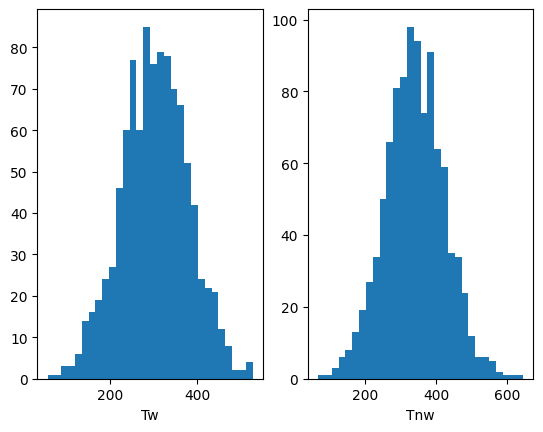

In [ ]:
N = 1000
mu_samples = np.random.normal(300, 50, N)
delta_samples = truncnorm(a=0, b=np.inf, loc=0, scale=50).rvs(N)
Tw_pred = np.random.normal(mu_samples, sigma)
Tnw_pred = np.random.normal(mu_samples + delta_samples, sigma)
plt.subplot(1,2,1)
plt.hist(Tw_pred, bins=30)
plt.xlabel('Tw')

plt.subplot(1,2,2)
plt.hist(Tnw_pred, bins=30)
plt.xlabel('Tnw')
plt.show()


*4.5.3*

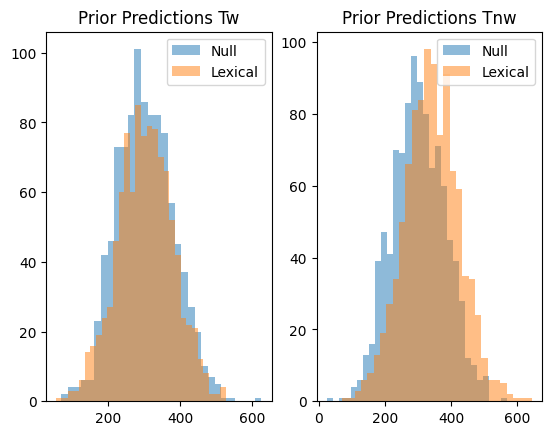

In [11]:
Tw_null = np.random.normal(mu_samples, sigma)
Tnw_null = np.random.normal(mu_samples, sigma)
plt.subplot(1,2,1)
plt.hist(Tw_null, bins=30, alpha=0.5, label='Null')
plt.hist(Tw_pred, bins=30, alpha=0.5, label='Lexical')
plt.title("Prior Predictions Tw")
plt.legend()

plt.subplot(1,2,2)
plt.hist(Tnw_null, bins=30, alpha=0.5, label='Null')
plt.hist(Tnw_pred, bins=30, alpha=0.5, label='Lexical')
plt.title("Prior Predictions Tnw")
plt.legend()
plt.show()


*4.5.4*

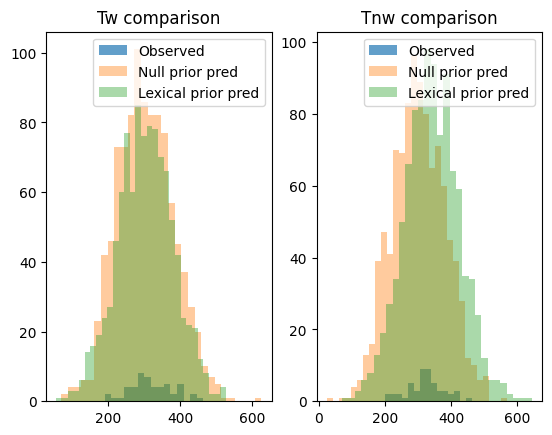

In [12]:
plt.subplot(1,2,1)
plt.hist(Tw, bins=15, label='Observed', alpha=0.7)
plt.hist(Tw_null, bins=30, alpha=0.4, label='Null prior pred')
plt.hist(Tw_pred, bins=30, alpha=0.4, label='Lexical prior pred')
plt.title("Tw comparison")
plt.legend()

plt.subplot(1,2,2)
plt.hist(Tnw, bins=15, label='Observed', alpha=0.7)
plt.hist(Tnw_null, bins=30, alpha=0.4, label='Null prior pred')
plt.hist(Tnw_pred, bins=30, alpha=0.4, label='Lexical prior pred')
plt.title("Tnw comparison")
plt.legend()

plt.show()


*4.5.5*

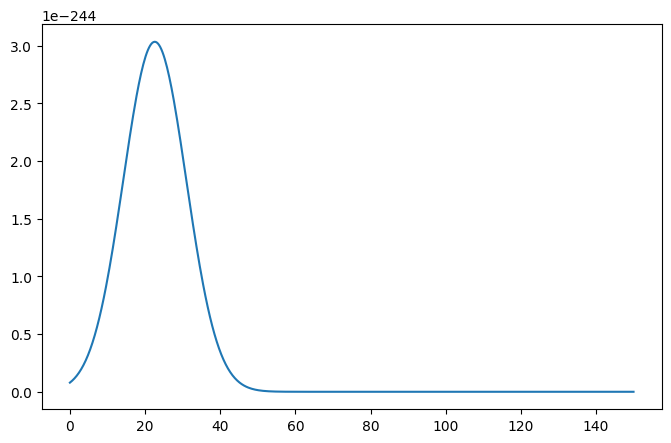

In [13]:
delta_vals = np.linspace(0, 150, 500)
posterior_delta_vals = [unnormalized_posterior(300, delta, Tw, Tnw) for delta in delta_vals]

plt.figure(figsize=(8,5))
plt.plot(delta_vals, posterior_delta_vals)
plt.show()
